In [192]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
import subprocess
import shlex

A = 12
f0 = 50
x = lambda t :  A * np.abs(np.sin(2 * np.pi * f0 * t) )

ts =  1e-4
t = np.arange(-2/f0, 2/f0, ts)
fs = np.arange(-10*f0, 10*f0, f0/2)
xn = x(t)

Xk_theo = (fft.fft(xn))
fft_freq = fft.fftfreq(xn.size, d=ts)




In [194]:
def fft_calc(k):
    global A
    return 2 * A /(np.pi * (1 - 4*k**2))

def XK_calc(f):
    if np.abs(f)%(2*f0)==0:
        return 800*fft_calc(f/(2*f0))
    else:
        return 0

In [210]:
xk_cal = []

for i in fs:
    #xk_cal.append([[i, i],[0, XK_calc(i)]])
    xk_cal.append(XK_calc(i))

-2037.1832715762605


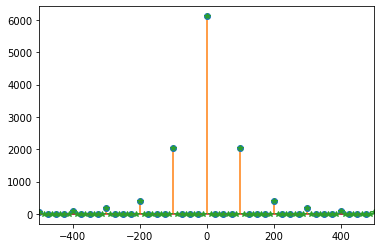

In [221]:

plt.stem(fs,np.abs(xk_cal), 'C1')
plt.plot(fft_freq, np.abs(Xk_theo), 'C2*')
plt.xlim(-10*f0, 10*f0)
plt.show()